# SPAM SMS DETECTION : 
An AI model for spam SMS detection was developed using the spam.csv dataset. The dataset consists of labeled SMS messages, enabling supervised learning. The model employed natural language processing techniques to analyze text features, distinguishing between legitimate and spam messages. Preprocessing involved tokenization, stemming, and vectorization to convert text into numerical data. Various machine learning algorithms, such as LogisticRegression, SVC, Naive Baise, Decision Tree Classifier, K Neighbors, Random Forest, AdaBoost, Bagging, ExtraTrees, GradientBoosting and XGB Classifier,  were likely explored to achieve optimal performance. he result is an efficient spam SMS detection system leveraging AI to enhance communication security.

In [1]:
#import required libraries
import numpy as np
import pandas as pd

In [2]:
#load dataset
df = pd.read_csv('spam.csv', encoding='latin-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5156,ham,"Sir, I need Velusamy sir's date of birth and c...",NaN,NaN,NaN
3486,ham,Change windows logoff sound..,NaN,NaN,NaN
4784,spam,Urgent -call 09066649731from Landline. Your co...,NaN,NaN,NaN
226,spam,Will u meet ur dream partner soon? Is ur caree...,NaN,NaN,NaN
606,spam,XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIAL...,NaN,NaN,NaN


In [3]:
#check the number of rows and columns in given dataset
df.shape

(5572, 5)

## 1. Data Cleaning:
Data cleaning is crucial in an AI model for Spam SMS Detection on the spam.csv dataset. It involves handling missing values, removing duplicates, and addressing inconsistencies to ensure accurate training. Clean data enhances the model's performance, preventing biases and errors that could impact the effectiveness of spam detection algorithms.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# drop the last 3 columns from dataset
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
df.sample(5)

,v1,v2
4549,ham,\Hey! do u fancy meetin me at 4 at cha åÐ hav ...
3507,ham,"Camera quite good, 10.1mega pixels, 3optical a..."
2681,ham,I'm on da bus going home...
438,ham,"Hi hope u get this txt~journey hasnt been gd,n..."
5479,ham,Really do hope the work doesnt get stressful. ...


In [7]:
# renaming the columns 
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2039,ham,Dont pack what you can buy at any store.like c...
3763,ham,Would me smoking you out help us work through ...
2616,ham,I went to ur hon lab but no one is there.
3318,ham,Kay... Since we are out already
240,ham,Tomarrow final hearing on my laptop case so i ...


In [8]:
#Label encoder converts categorical labels to numerical format for model compatibility.
#ham:0, spam:1
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# check the missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
# check for duplicate values
df.duplicated().sum()

403

In [12]:
# remove duplicates
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [13]:
#check the number of rows and columns after cleaning the dataset
df.shape

(5169, 2)

## 2. EDA
Exploratory Data Analysis (EDA) in an AI model for Spam SMS Detection on the spam.csv dataset involves visualizing and understanding data patterns. It helps identify key features, assess class distributions, and uncover potential biases, aiding in informed decisions during preprocessing and model development for more effective spam detection.

In [14]:
#import required libraries for EDA
import seaborn as sns

In [15]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
#count the occurrences of unique values in the 'target' column 
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

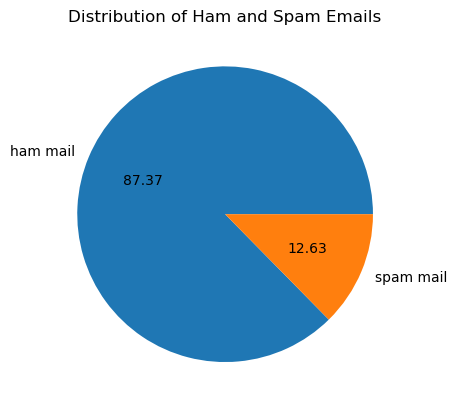

In [17]:
#Given pi chart represents the distribution of 'ham mail' (non-spam) and 'spam mail' in the 'target' column. 
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham mail','spam mail'],autopct="%0.2f")
plt.title('Distribution of Ham and Spam Emails')
plt.show()

## NLTK:
NLTK (Natural Language Toolkit) is a Python library for working with human language data. In an AI model for Spam SMS Detection on the spam.csv dataset, NLTK is used for natural language processing tasks like tokenization, stemming, and stopword removal. It aids in extracting meaningful features from text data, enhancing model accuracy. In short, it is used for balancing the dataset.

In [18]:
!pip install nltk

In [19]:
#importing the required libraries for nltk
import string
from nltk.corpus import stopwords
import nltk

In [20]:
#It is a command in the Natural Language Toolkit (NLTK) library in Python. 
#It is used to download the "punkt" resource, which is a data package containing pre-trained models and data for tokenization. 
#Tokenization is the process of breaking down text into individual words or tokens.
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mayur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
#adding a new column, 'num_characters', to a DataFrame
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
# creating a new column, 'num_words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
#adding a new column, 'num_sentences', to the DataFrame df based on the 'text' column.
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
#generates a statistical summary of the columns 
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [25]:
# Descriptive statistics for features in ham class (target=1) displayed.
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [26]:
#Descriptive statistics for features in spam class (target=1) displayed.
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


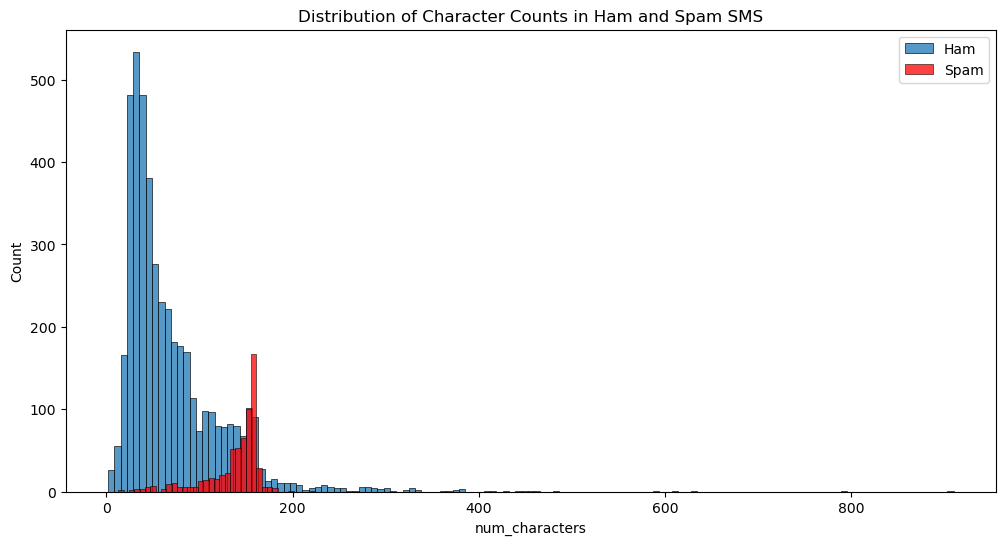

In [27]:
#visualizes the distribution of character counts in ham (0) and spam (1) SMS messages.
plt.figure(figsize=(12,6))
plt.title('Distribution of Character Counts in Ham and Spam SMS')
sns.histplot(df[df['target'] == 0]['num_characters'], label='Ham')
sns.histplot(df[df['target'] == 1]['num_characters'], color='red', label='Spam')
plt.legend()


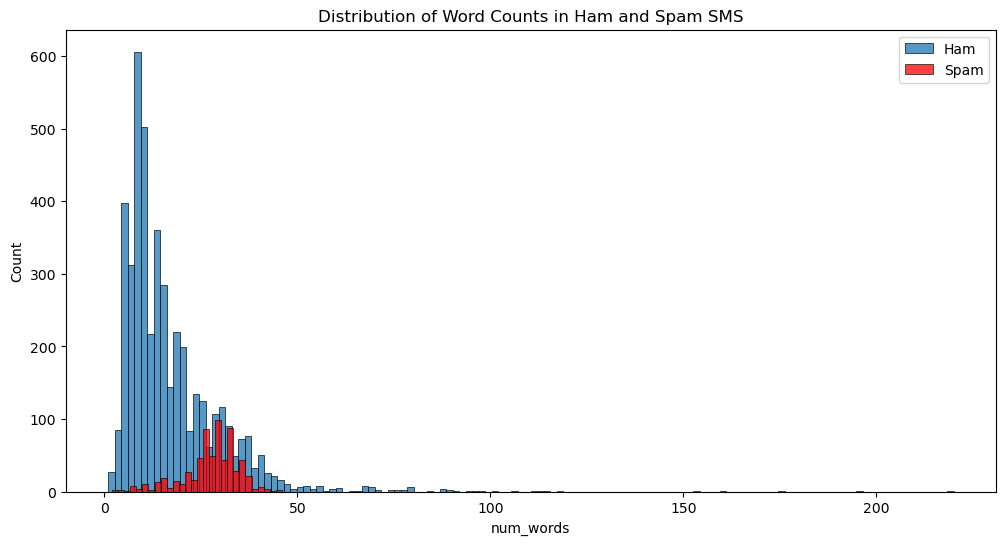

In [28]:
#visualizes the distribution of word counts in ham (0) and spam (1) SMS messages.
plt.figure(figsize=(12,6))
plt.title('Distribution of Word Counts in Ham and Spam SMS')
sns.histplot(df[df['target'] == 0]['num_words'], label='Ham')
sns.histplot(df[df['target'] == 1]['num_words'], color='red', label='Spam')
plt.legend()


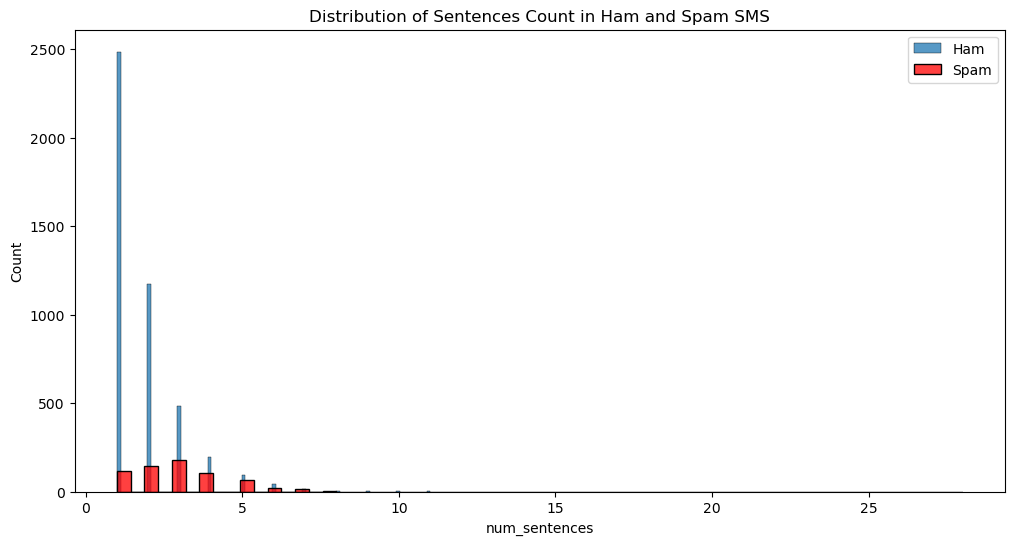

In [29]:
#visualizes the distribution of character counts in ham (0) and spam (1) SMS messages.
plt.figure(figsize=(12,6))
plt.title('Distribution of Sentences Count in Ham and Spam SMS')
sns.histplot(df[df['target'] == 0]['num_sentences'], label='Ham')
sns.histplot(df[df['target'] == 1]['num_sentences'], color='red', label='Spam')
plt.legend()

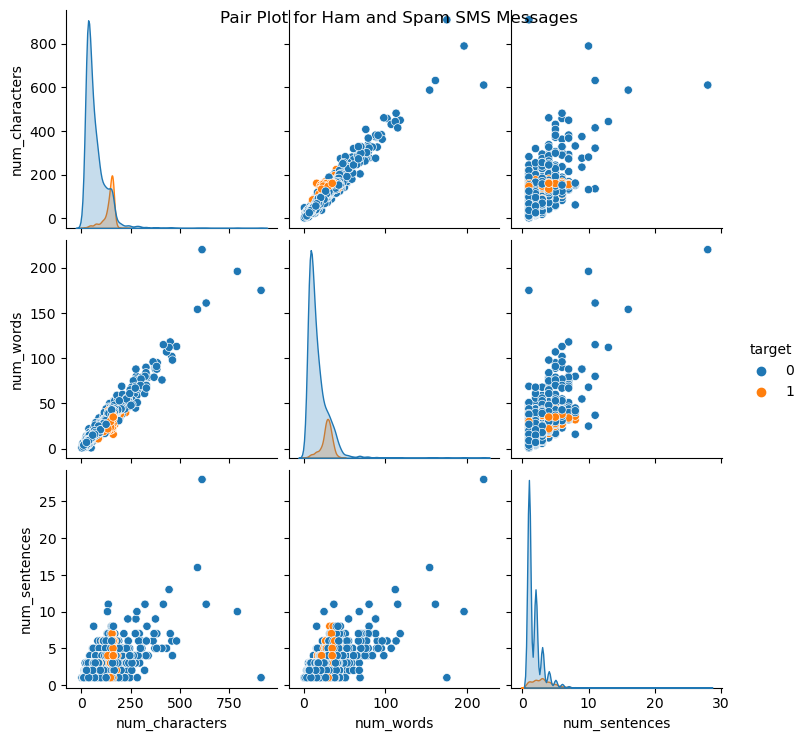

In [30]:
#creates a pair plot for features in 'ham' and 'spam' SMS messages.
sns.pairplot(df, hue='target')
plt.suptitle('Pair Plot for Ham and Spam SMS Messages')
plt.show()

C:\Users\Mayur\AppData\Local\Temp\ipykernel_15152\2903436382.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


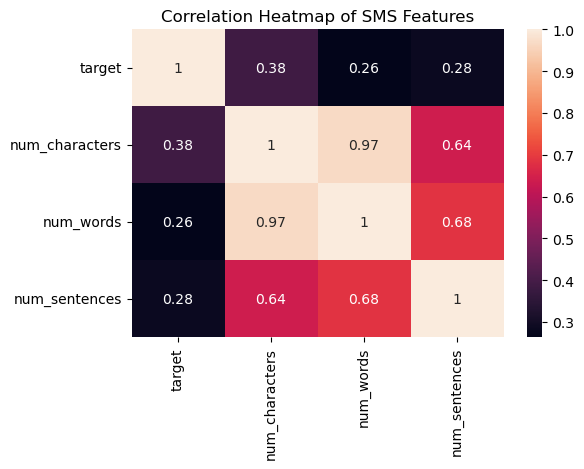

In [31]:
#represents the correlation matrix 
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap of SMS Features')
plt.show()

## 3. Data Preprocessing

In [32]:
#downloads NLTK's stopwords, common words removed during text analysis.
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mayur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
#retrieves a list of English stopwords for text processing.
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [34]:
#Generates a string of punctuation characters for text processing operations.
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [35]:
#Utilizes Porter stemming to reduce 'loving' to its root form (Reduces words to their base or root form for consistency).
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

*   Lower case : Converts text to lowercase for uniformity in analysis.
*   Tokenization : Divides text into individual words (tokens) for analysis.
*   Removing special characters : Eliminates non-alphanumeric symbols for cleaner text representation.
*   Removing stop words and punctuation : Filters out common words and symbols for focused analysis.
*   Stemming : Reduces words to their base or root form for consistency.

In [36]:
def transform_text(text):
    text = text.lower() #Lower case
    text = nltk.word_tokenize(text) #Tokenization

    y = []
    for i in text:
      if i.isalnum():  #Removing special characters
          y.append(i)

    text = y[:]
    y.clear()

    for i in text:
      if i not in stopwords.words('english') and i not in string.punctuation: #Removing stop words and punctuation
        y.append(i)

    text = y[:]
    y.clear()

    for i in text:
      y.append(ps.stem(i)) #Stemming


    return " ".join(y)  #Combines processed words into a clean text string.

In [37]:
#Accesses text data in the DataFrame at index 8 for analysis.
df['text'][8]

'WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.'

In [38]:
#Check the sentence

transform_text("WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.")

'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour'

In [39]:
#Preprocessing enhances model accuracy by cleaning and transforming text features.
df['transform_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## Visualizing the word frequencies, often applied in text analysis tasks.

In [40]:
#installing the 'wordcloud' Python package
!pip install wordcloud

In [41]:
#creates a WordCloud object with specified parameters#creates a WordCloud object with specified parameters
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

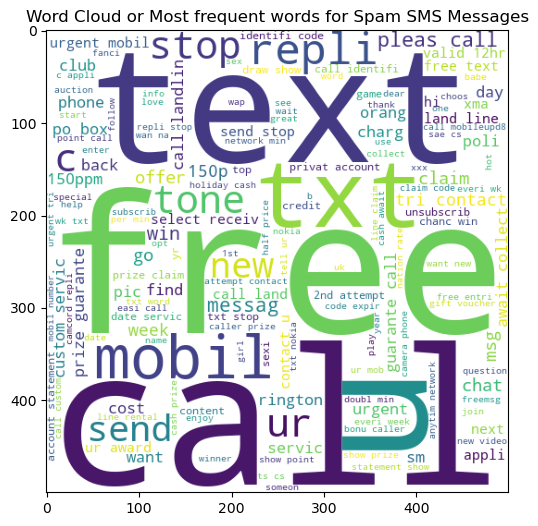

In [42]:
#Word cloud displays frequent words in spam messages for analysis.
spam_wc = wc.generate(df[df['target'] == 1]['transform_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.title('Word Cloud or Most frequent words for Spam SMS Messages')
plt.show()


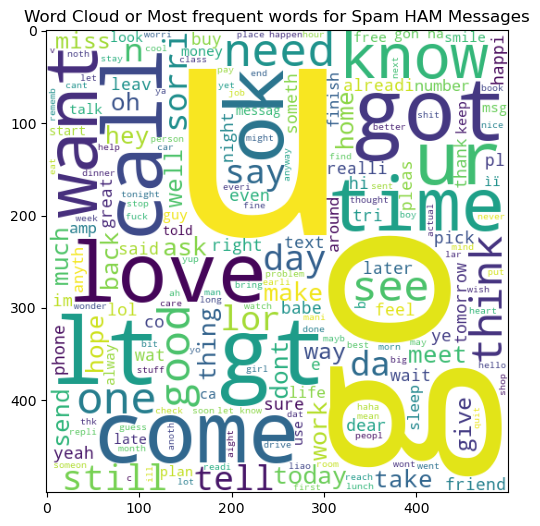

In [43]:
##Word cloud displays frequent words in ham messages for analysis.
ham_wc = wc.generate(df[df['target'] == 0]['transform_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)
plt.title('Word Cloud or Most frequent words for Spam HAM Messages')
plt.show()

In [44]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [45]:
#Extracts words from preprocessed spam messages for spam corpus creation.
spam_corpus = []
for msg in df[df['target'] == 1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [46]:
#number of elements in the spam_corpus
len(spam_corpus)

9939

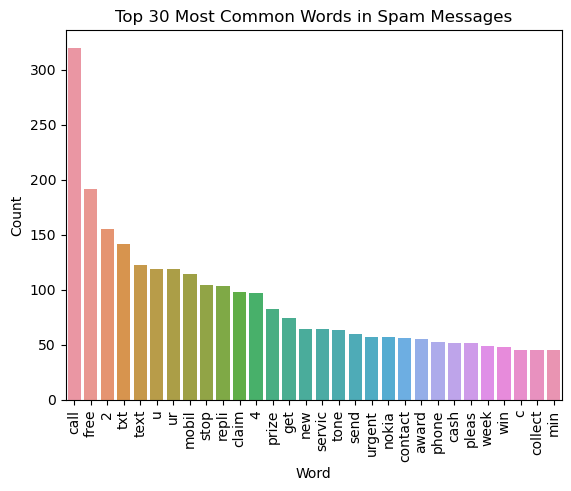

In [47]:
#The code analyzes and visualizes the most common words in a spam corpus using a Counter and a Seaborn barplot 
#for insights into frequent terms in spam messages.

from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming ham_corpus is a list of values
spam_counter = Counter(spam_corpus)
most_common_30_spam = spam_counter.most_common(30)

# Create a DataFrame from the Counter results
df_counts_spam = pd.DataFrame(most_common_30_spam, columns=['Word', 'Count'])

# Plotting using Seaborn
sns.barplot(x='Word', y='Count', data=df_counts_spam)
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Spam Messages')
plt.show()


In [48]:
##Extracts words from preprocessed spam messages for ham corpus creation.
ham_corpus = []
for msg in df[df['target'] == 0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [49]:
##number of elements in the spam_corpus
len(ham_corpus)

35394

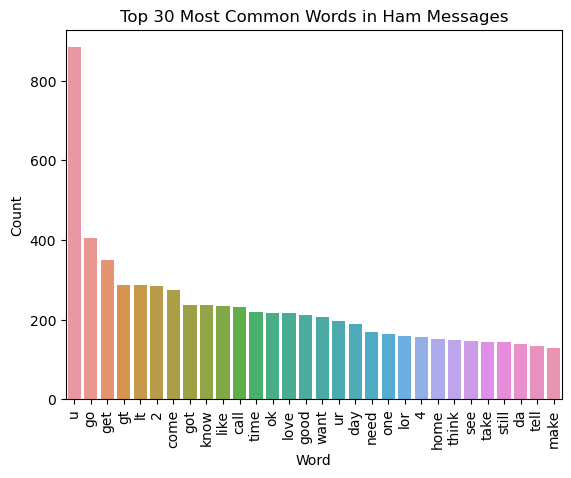

In [50]:
#The code analyzes and visualizes the most common words in a ham_corpus using a Counter and a Seaborn barplot 
#for insights into frequent terms in spam messages.

from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming ham_corpus is a list of values
ham_counter = Counter(ham_corpus)
most_common_30_ham = ham_counter.most_common(30)

# Create a DataFrame from the Counter results
df_counts_ham = pd.DataFrame(most_common_30_ham, columns=['Word', 'Count'])

# Plotting using Seaborn
sns.barplot(x='Word', y='Count', data=df_counts_ham)
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Ham Messages')
plt.show()


In [51]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4.Model Building

In the model-building phase of the Spam SMS Detection AI model, a comprehensive ensemble of machine learning algorithms was employed, including Logistic Regression, Support Vector Classifier, Naive Bayes, Decision Tree Classifier, K Neighbors, Random Forest, AdaBoost, Bagging, ExtraTrees, Gradient Boosting, and XGB Classifier.

In [52]:
#CountVectorizer and TfidfVectorizer to convert text data into numerical features.

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [53]:
#converts the text into numerical vectors, enabling algorithms to process 
#and learn patterns in the Spam SMS Detection model effectively.

X = tfidf.fit_transform(df['transform_text']).toarray()

In [54]:
X.shape

(5169, 3000)

In [55]:
#extracts the target variable 'target' for model training.
y = df['target'].values

In [56]:
#splits the dataset into training and testing sets.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [57]:
#imports Naive Bayes classifiers and evaluation metrics for classification
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [58]:
#initializes three Naive Bayes classifiers
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [59]:
#fits a Multinomial Naive Bayes model and evaluates its accuracy, confusion matrix, and precision
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [60]:
#fits a Multinomial Naive Bayes model and evaluates its accuracy, confusion matrix, and precision
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [61]:
#fits a Bernoull Naive Bayes model and evaluates its accuracy, confusion matrix, and precision
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


### tfidf => MNB
TFIDF transforms text into numerical features; MNB uses these features for efficient spam SMS detection.


In [62]:
!pip install xgboost

In [63]:
#imports various classifiers

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [64]:
#initializes various classifiers (SVC, KNeighbors, MultinomialNB, etc.) 
#with specific configurations & essential for ensemble-based model building.

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [65]:
#creates a dictionary and store all algorithm

clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [66]:
#create a function to train a classifier, make predictions, and calculate accuracy and precision scores.

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [67]:
#encapsulates the process of training and testing of SVC model
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [68]:
#calculate accuracy and precision scores for various classifiers by using loop

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8671875
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.92
For  xgb
Accuracy -  0.9661508704061895
Precision -  0.9256198347107438


In [69]:
#evaluates the performance metrics (Accuracy, Precision) for various algorithms, aiding algorithm comparison.

performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.966151,0.925620
9,GBDT,0.947776,0.920000
7,BgC,0.957447,0.867188


In [70]:
#reshapes the DataFrame performance_df for better visualization and analysis.

performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.974855
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.966151
8,GBDT,Accuracy,0.947776
9,BgC,Accuracy,0.957447


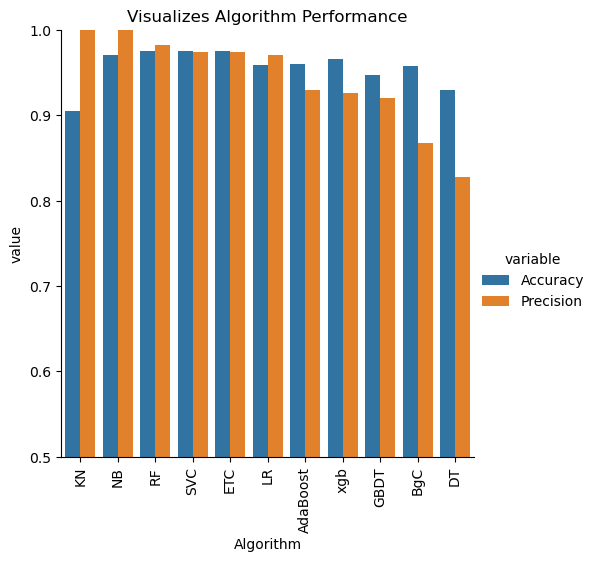

In [71]:
#visualizes algorithm performance using a categorical plot

sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.title('Visualizes Algorithm Performance')
plt.show()

## 5.Model improvement

1. By changing the max_features parameter of TfIdf: 
Evaluates the impact of changing the 'max_features' parameter in the TF-IDF vectorizer on the performance of various machine learning algorithms. Creates New DataFrames to compare accuracy and precision scores under different parameter settings, providing insights into algorithm behavior with varying text feature representations.

In [72]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,
                        'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [73]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,
                        'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [74]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [75]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [76]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,
                        'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [77]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,xgb,0.966151,0.925620,0.966151,0.925620,0.966151,0.925620,0.966151,0.925620
8,GBDT,0.947776,0.920000,0.947776,0.920000,0.947776,0.920000,0.947776,0.920000
9,BgC,0.957447,0.867188,0.957447,0.867188,0.957447,0.867188,0.957447,0.867188


2. By Voting Classifier:
The Voting Classifier is an ensemble learning method in machine learning where multiple models are combined to improve overall performance. It aggregates the predictions of individual classifiers (e.g., Decision Tree, SVM, or Logistic Regression) and outputs the class that receives the majority of votes. This approach often results in a more robust and accurate predictive model.


In [78]:
from sklearn.ensemble import VotingClassifier

svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)



In [79]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [80]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [81]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [82]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


3. By applying stacking : Stacking involves training a meta-model on the predictions of base models. The base models learn from the input data, and their outputs become the input for the meta-model, enhancing the model's ability to generalize and make accurate predictions.

In [83]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [84]:
from sklearn.ensemble import StackingClassifier

In [85]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [86]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9328358208955224


# Creating pickle files for Deployment

In [87]:
import pickle
pickle.dump(tfidf,open('vectorized.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))